# Regression - Case Studies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Working with Small Dataset

Let us create a small set of data which would obey to a 3rd degree polynomial function, but with some added noise.

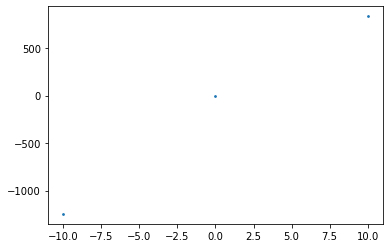

In [5]:
def func(x):
    return x**3 - 2 * x**2 + 4 * x - 5

X = np.linspace(-10, 10, 3)
y = np.array( [func(x) for x in X] )

plt.scatter(X, y, s = 3)